# Supplementary material for the association of LTC and its gradient with connectivity

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import helpers, datasets, surfaces, matrices


DATA_DIR = '../data/'
OUTPUT_DIR = '../output/'
SRC_DIR = '../src/'

sns.set_style('ticks')

/home/asaberi/laminar_gradients/laminar_gradients_conda/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


# 1. The association of LTC and its gradient with functional connectivity

## a) Functional connectivity matrix

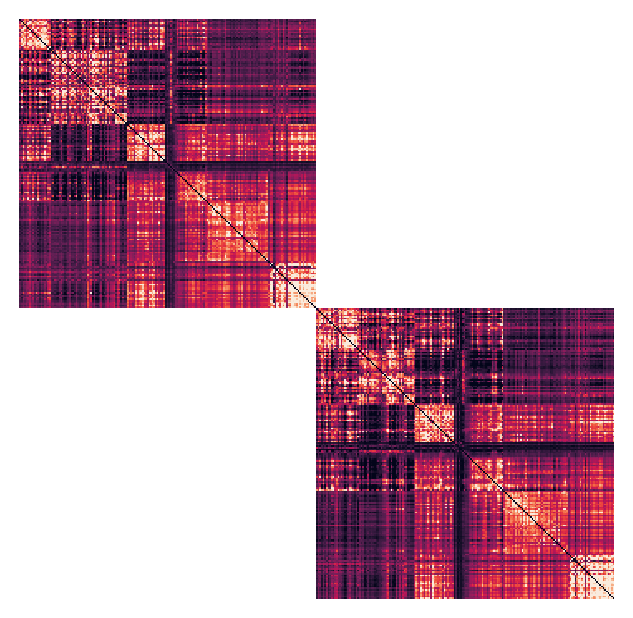

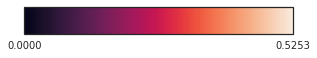

In [2]:
fc = matrices.ConnectivityMatrix('functional', exc_regions='adysgranular', exc_contra=True)
fc.plot()

## b) LTC in association with FC probability

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Optimization terminated successfully.
         Current function value: 0.489084
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                 0.02571
Time:                        09:01:04   Log-Likelihood:                -15671.
converged:                       True   LL-Null:                       -16084.
Covariance Type:            nonrobust   LLR p-value:                7.062e-182
                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------

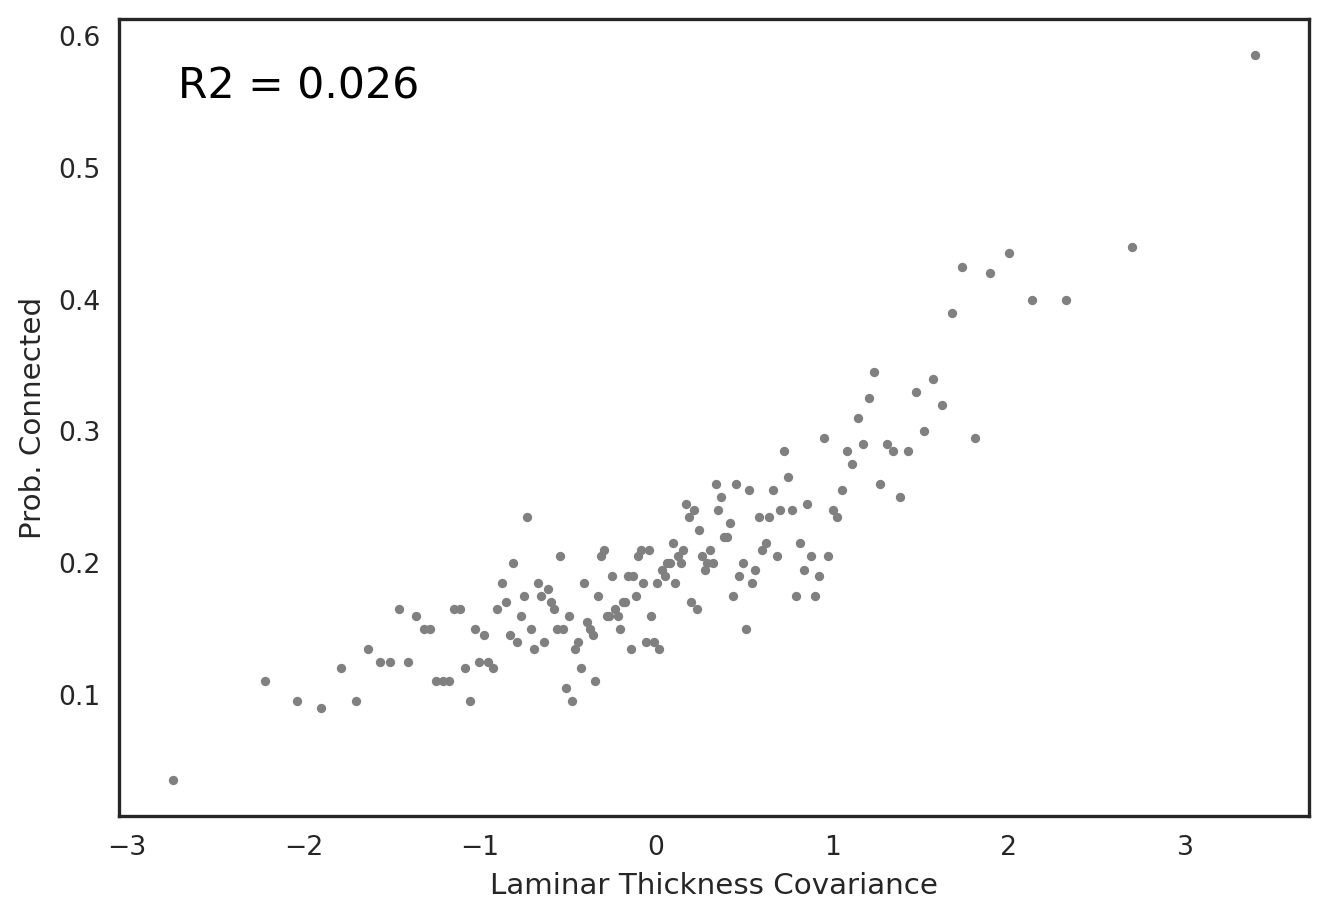

In [3]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
models, pvals, null_models = fc.binarized_association(ltc, spin_test=True, n_perm=1000)
print(pvals)

## c) LTC in associaiton with FC strength

In [4]:
fc_thr = matrices.ConnectivityMatrix('functional', threshold=True, exc_contra=True)

Pearson correlation with Functional connectivity
Coef: 0.2627146074299715; p-value (spin): 0.0


(0.2627146074299715, 0.0)

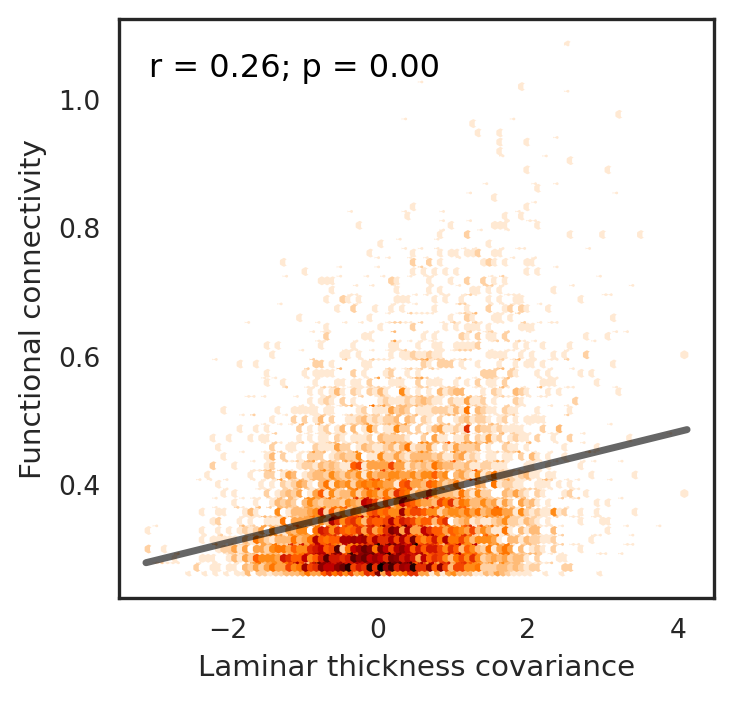

In [5]:
ltc.correlate_edge_wise(fc_thr, n_perm=1000, axis_off=False, figsize=(4, 4))

## d) Geodesic distance in association with FC probability

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz
Optimization terminated successfully.
         Current function value: 0.468926
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                 0.06587
Time:                        09:03:29   Log-Likelihood:                -15025.
converged:                       True   LL-Null:                       -16084.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

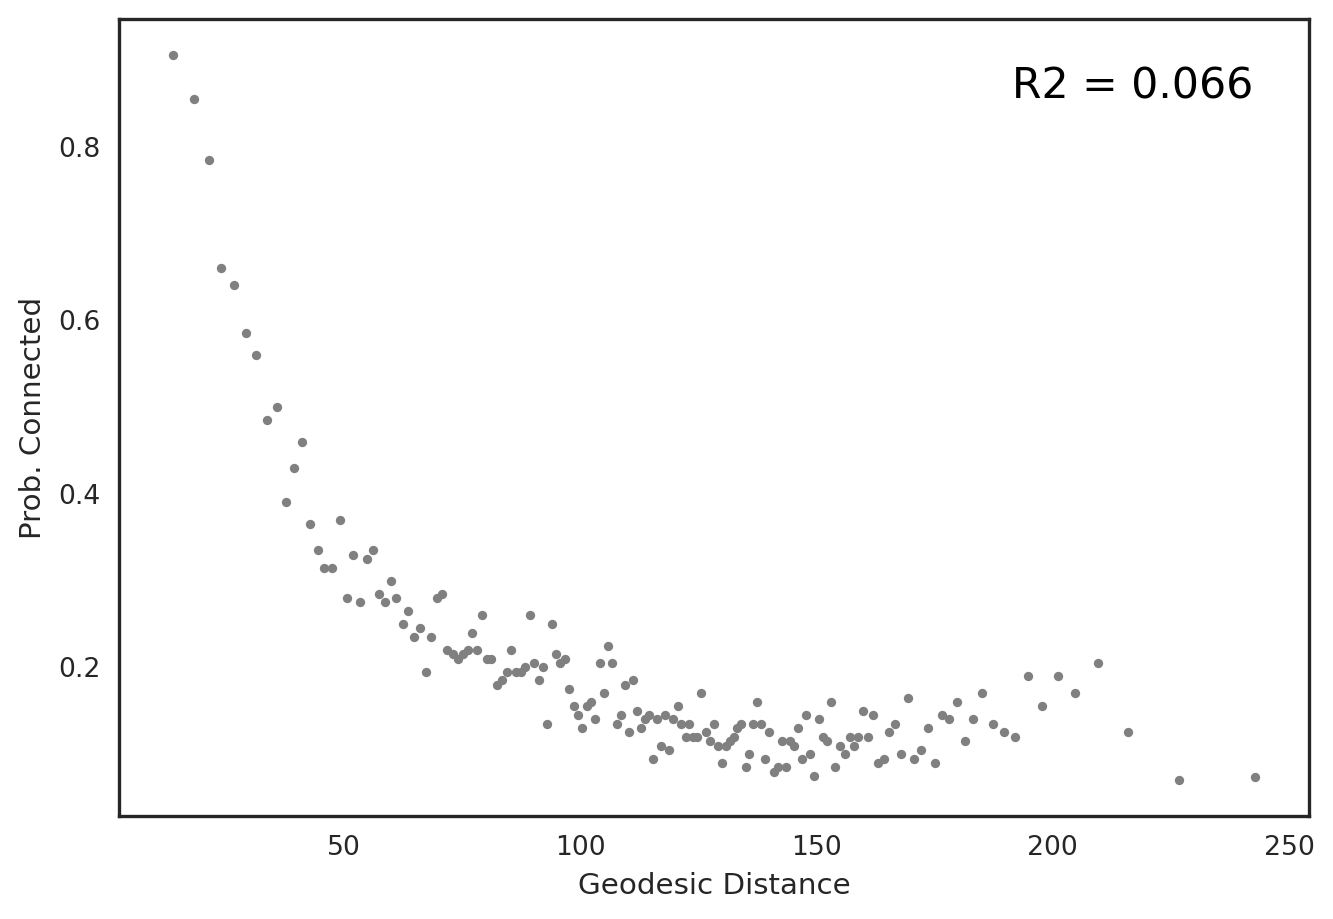

In [6]:
gd = matrices.DistanceMatrix('schaefer400')
models, pvals, null_models = fc.binarized_association(gd, spin_test=True, n_perm=1000)
print(pvals)

## e) Geodesic distance in association with FC strength

R2: 0.11730392536936796


/home/asaberi/laminar_gradients/laminar_gradients_conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


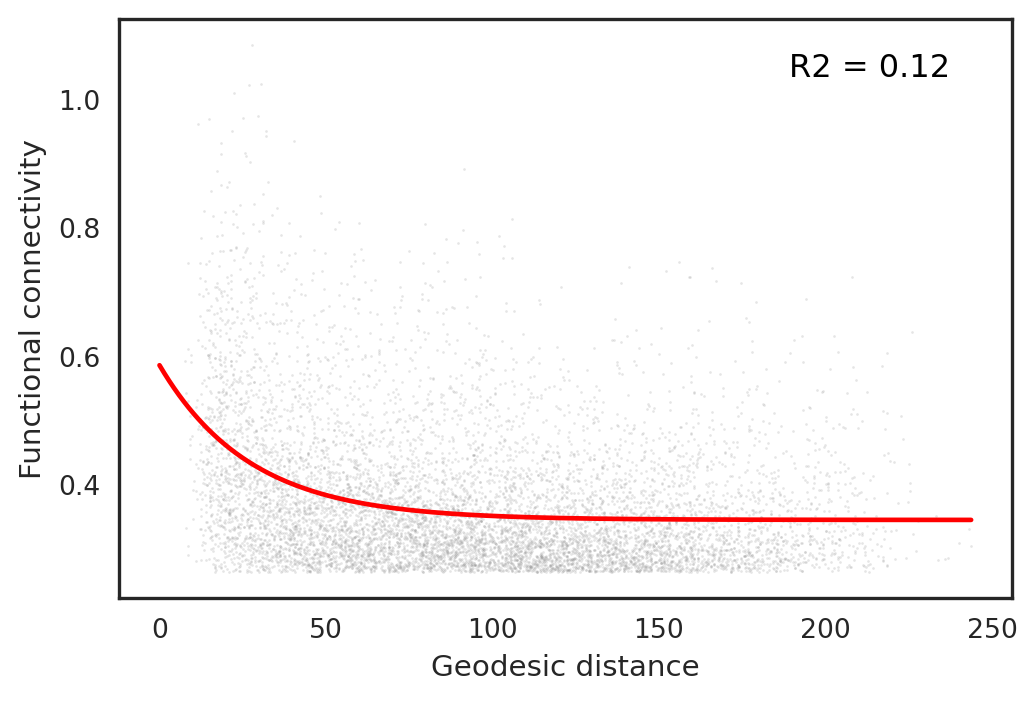

In [7]:
_ = gd.regress_out(fc_thr)

## f) LTC in association with long-range FC probability

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz
Optimization terminated successfully.
         Current function value: 0.499608
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                24597
Model:                          Logit   Df Residuals:                    24595
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                0.001768
Time:                        09:05:51   Log-Likelihood:                -12289.
converged:                       True   LL-Null:                       -12311.
Covariance Type:            nonrobust   LLR p-value:                 4.200e-11
                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------

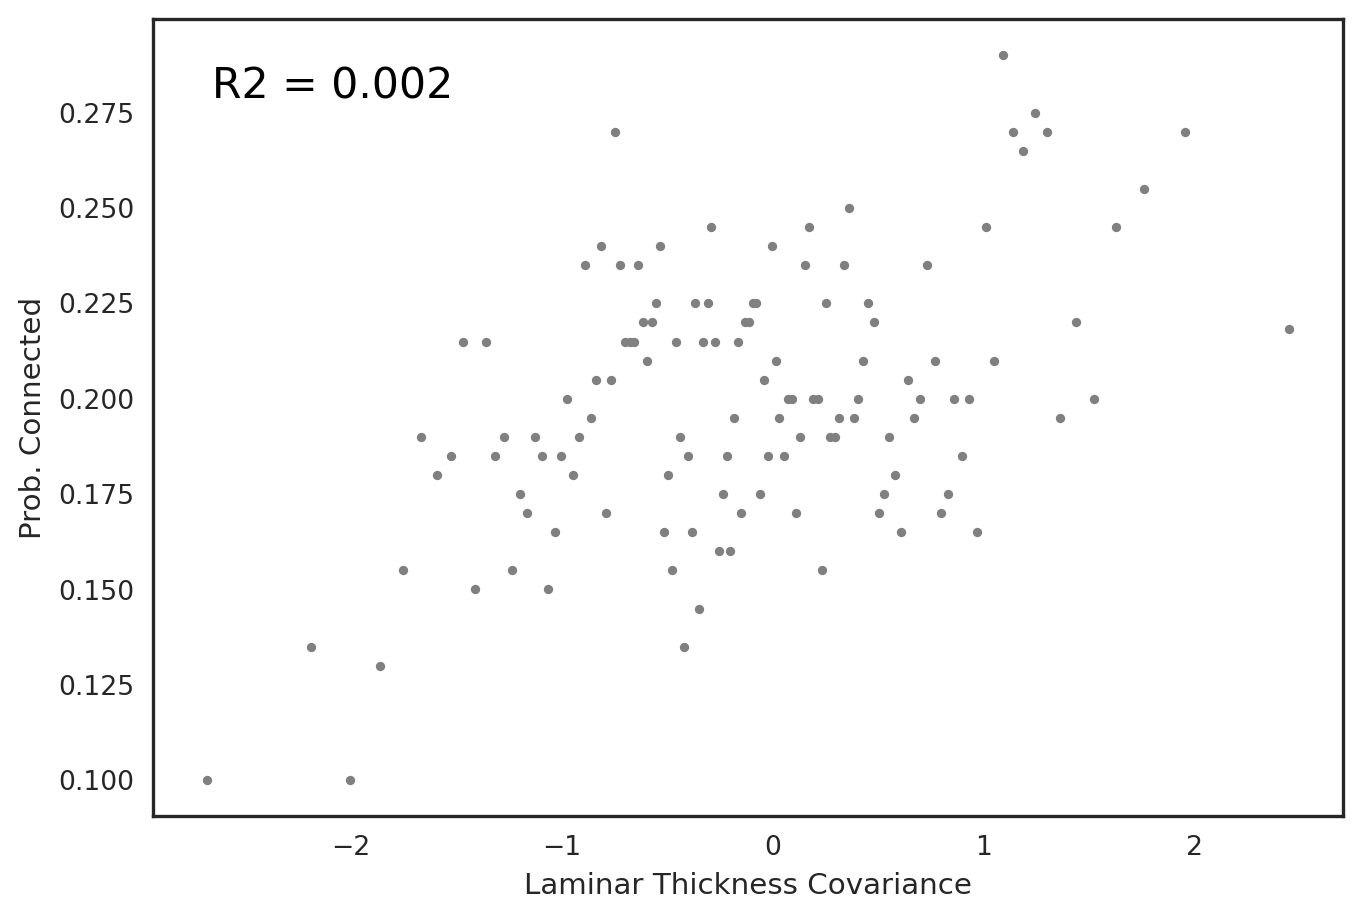

In [8]:
fc_long_range = matrices.ConnectivityMatrix('functional', exc_regions='adysgranular', exc_contra=True, long_range=True)
models, pvals, null_models = fc_long_range.binarized_association(ltc, spin_test=True, n_perm=1000)
print(pvals)

## g) LTC in association with long-range FC strength

In [9]:
fc_thr_long_range = matrices.ConnectivityMatrix('functional', threshold=True, exc_contra=True, long_range=True)

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz


Pearson correlation with Functional connectivity
Coef: 0.12539926164852572; p-value (spin): 0.021


(0.12539926164852572, 0.021)

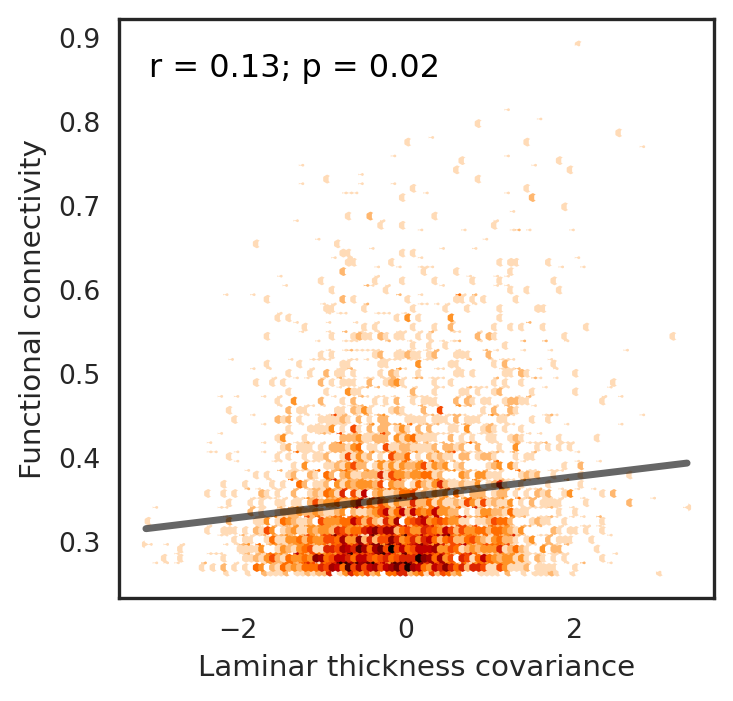

In [10]:
ltc.correlate_edge_wise(fc_thr_long_range, n_perm=1000, axis_off=False, figsize=(4, 4))

# 2. The association of LTC and its gradient with resting state networks

Map of Yeo networks:

![yeo](https://github.com/ThomasYeoLab/CBIG/raw/master/stable_projects/brain_parcellation/Yeo2011_fcMRI_clustering/readme_figures/Yeo2011_network_parcellation_fs5.png)

Mean LTC within/between networks:

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating p-value with permutation testing (1000 permutations)
Perm 0
Perm 100
Perm 200
Perm 300
Perm 400
Perm 500
Perm 600
Perm 700
Perm 800
Perm 900


,intra,inter,pvals
Visual,0.950039,-0.235447,0.012
Somatomotor,0.399902,-0.032586,0.075
Dorsal attention,0.571410,-0.045271,0.011
Ventral attention,0.293591,0.047710,0.054
Limbic,0.294859,0.027221,0.673
Frontoparietal,0.215129,0.047115,0.233
Default,0.139656,0.061435,0.301
All,0.407527,-0.041251,0.000


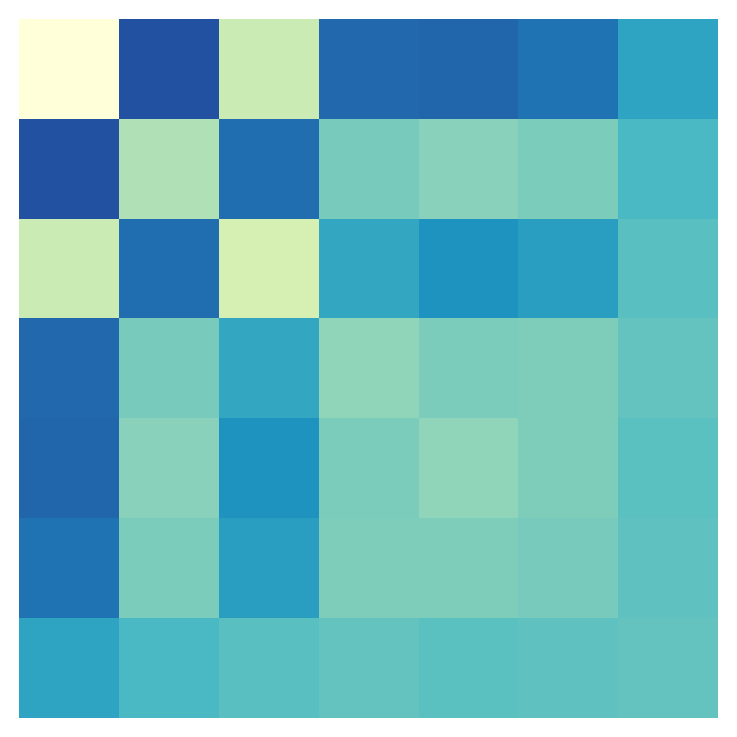

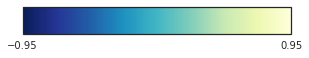

In [11]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh')
yeo = surfaces.YeoNetworks(parcellation_name='sjh')
ltc.associate_categorical_surface(yeo)

LTC G1 in association with the Yeo networks:

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
ANOVA Results
--------
----
LTC G1: F statistic 82.51006706644948, pvalue 4.673985471662247e-82
	Post-hoc T-tests passing alpha of 0.002380952380952381:
		Visual - Somatomotor: T 21.07580012338606, p 2.264465348558863e-63
		Visual - Ventral attention: T 13.344535370257631, p 9.94169232325433e-31
		Visual - Limbic: T 13.787865680946092, p 1.0104867396450936e-31
		Visual - Frontoparietal: T 13.745805049529004, p 8.546170547457402e-33
		Visual - Default: T 12.640297722150938, p 1.2942791304576412e-30
		Somatomotor - Dorsal attention: T -13.861727866842434, p 2.1689623106143733e-33
		Somatomotor - Ventral attention: T -3.1721080373362134, p 0.001696512141812686
		Somatomotor - Frontoparietal: T -3.47359646233229, p 0.000593914529888422
		Somatomotor - Default: T -7.477863909409763, p 5.201410358172098e-13
		Dorsal attention - Ventral attention: T 8.37

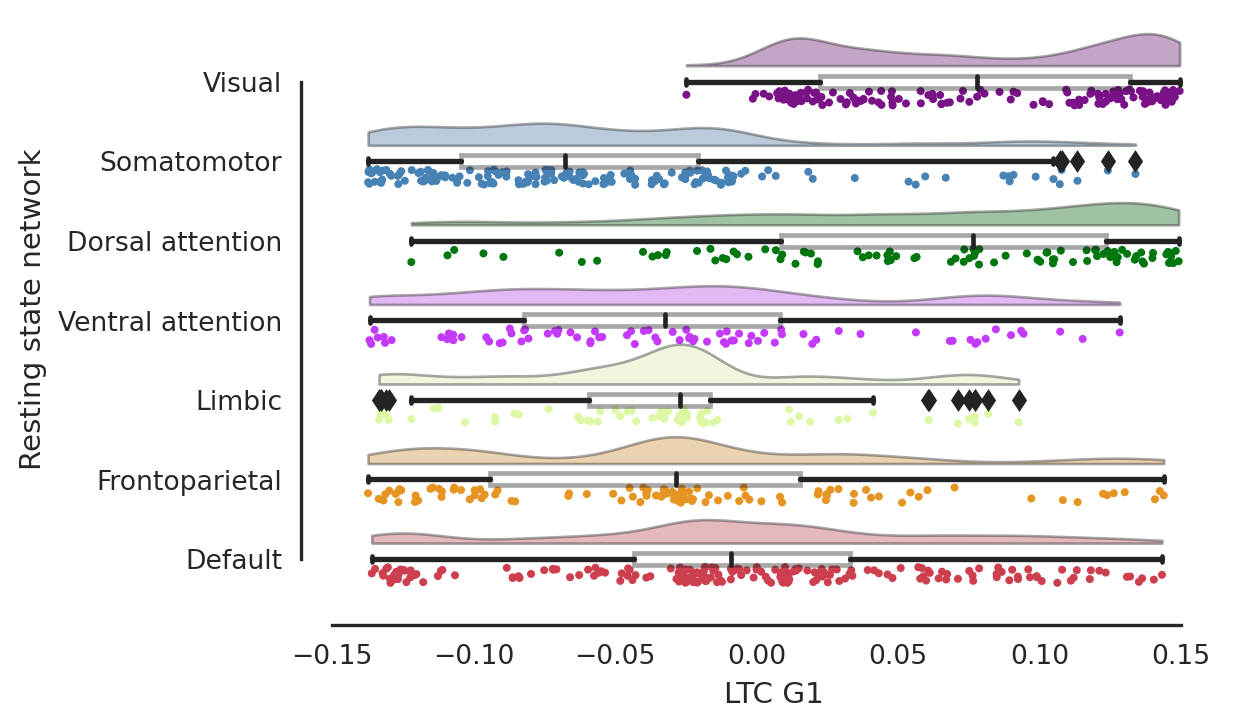

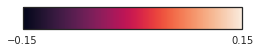

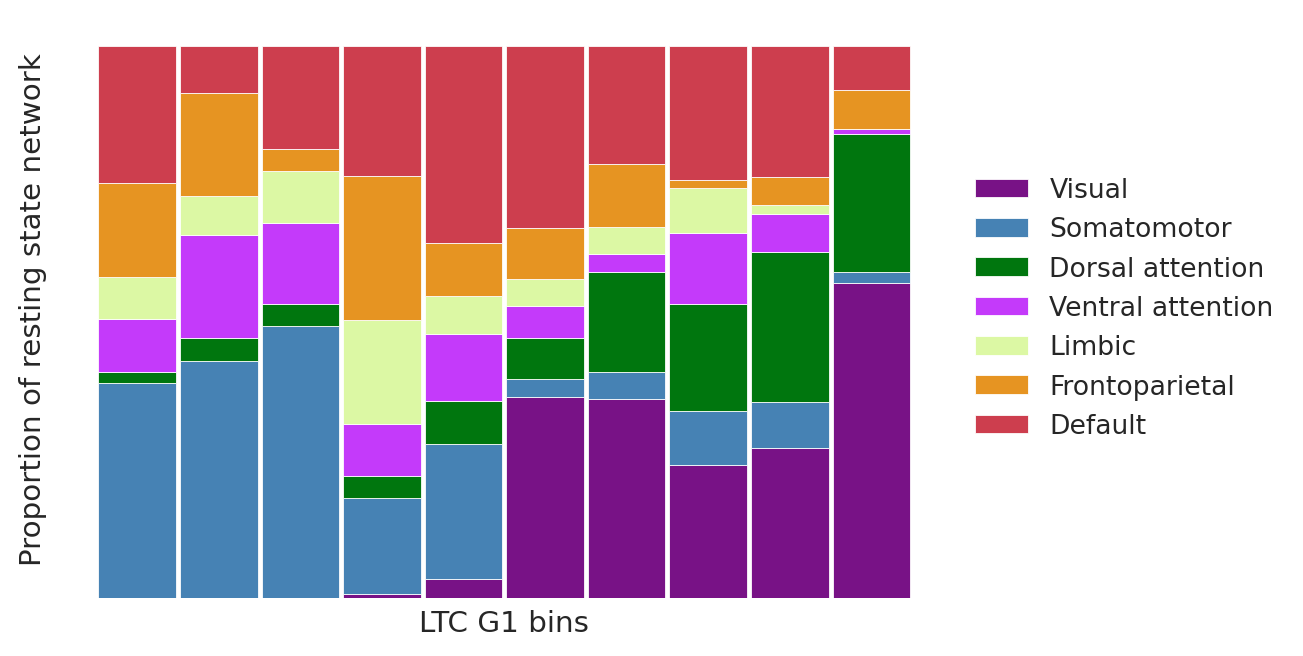

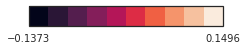

In [12]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc)
yeo.compare(ltcg, ['LTC G1'])

# 3. Association of difference in laminar thickness of individual layers with SC probability and strength

### Layer 1

Optimization terminated successfully.
         Current function value: 0.314066
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                 0.01546
Time:                        09:09:03   Log-Likelihood:                -10063.
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                 1.021e-70
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7858      0.030    -59.004      0.000      -1.845      -1.726
inv_abs_diff_l

'spin pvalue for binarized association: 0.003'

Pearson correlation with Structural connectivity
Coef: 0.18611399660130123; p-value (spin): 0.0


### Layer 2

Optimization terminated successfully.
         Current function value: 0.316516
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                0.007784
Time:                        09:11:37   Log-Likelihood:                -10141.
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                 1.766e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.9613      0.028    -70.600      0.000      -2.016      -1.907
inv_abs_diff_l

'spin pvalue for binarized association: 0.0'

Pearson correlation with Structural connectivity
Coef: 0.073210473374079; p-value (spin): 0.199


### Layer 3

Optimization terminated successfully.
         Current function value: 0.313936
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                 0.01587
Time:                        09:14:11   Log-Likelihood:                -10059.
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                 1.531e-72
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7934      0.030    -60.190      0.000      -1.852      -1.735
inv_abs_diff_l

'spin pvalue for binarized association: 0.0'

Pearson correlation with Structural connectivity
Coef: 0.1430428065311888; p-value (spin): 0.002


### Layer 4

Optimization terminated successfully.
         Current function value: 0.315418
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                 0.01123
Time:                        09:16:45   Log-Likelihood:                -10106.
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                 7.765e-52
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.9608      0.026    -74.292      0.000      -2.012      -1.909
inv_abs_diff_l

'spin pvalue for binarized association: 0.0'

Pearson correlation with Structural connectivity
Coef: 0.03562506271165333; p-value (spin): 0.67


### Layer 5

Optimization terminated successfully.
         Current function value: 0.316046
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                0.009258
Time:                        09:19:19   Log-Likelihood:                -10126.
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                 4.643e-43
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.9407      0.028    -69.881      0.000      -1.995      -1.886
inv_abs_diff_l

'spin pvalue for binarized association: 0.0'

Pearson correlation with Structural connectivity
Coef: 0.051772203324531293; p-value (spin): 0.524


### Layer 6

Optimization terminated successfully.
         Current function value: 0.303070
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                 0.04993
Time:                        09:21:54   Log-Likelihood:                -9710.7
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                5.509e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4389      0.030    -48.659      0.000      -1.497      -1.381
inv_abs_diff_l

'spin pvalue for binarized association: 0.0'

Pearson correlation with Structural connectivity
Coef: 0.21640689602699217; p-value (spin): 0.0


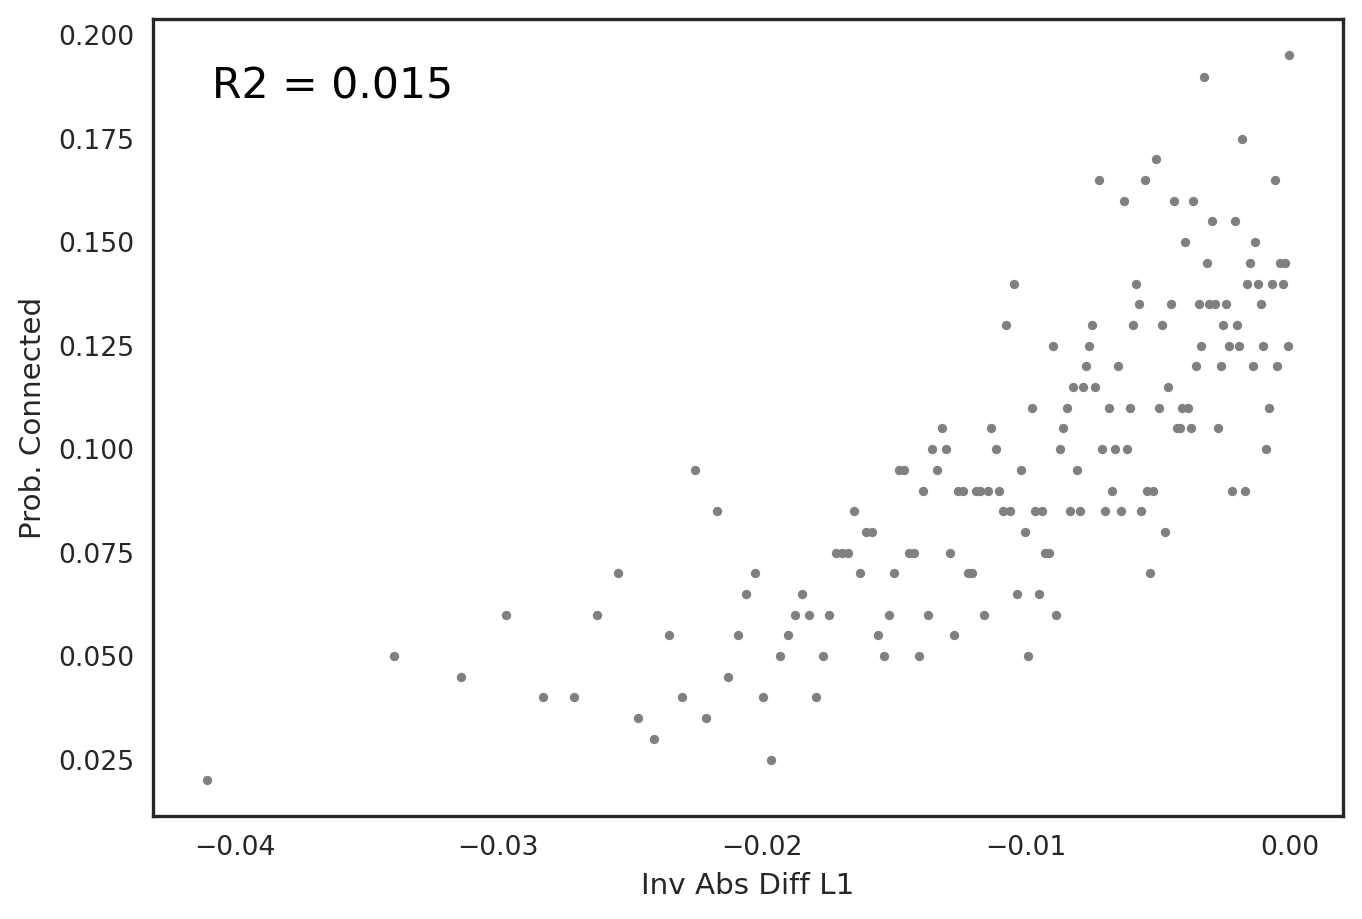

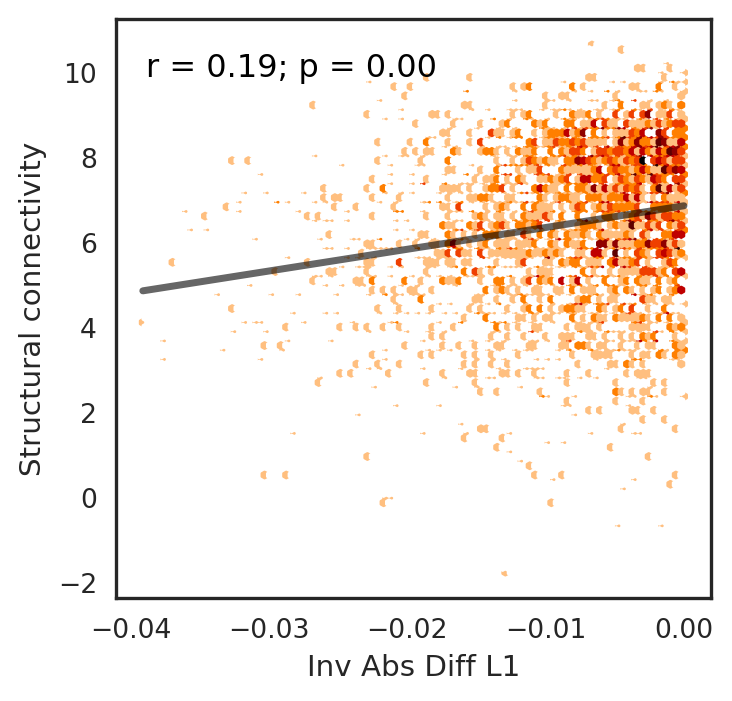

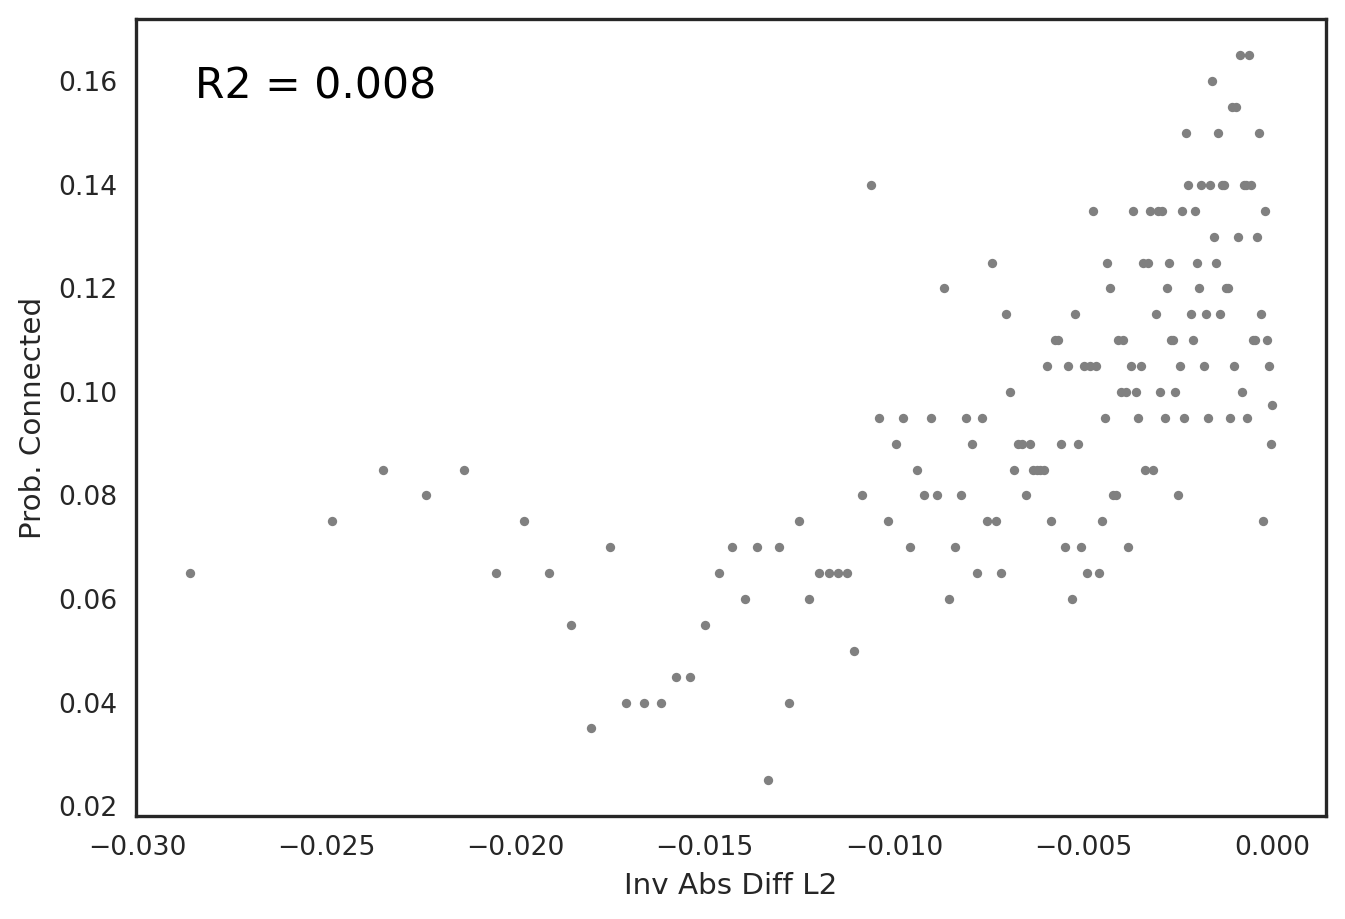

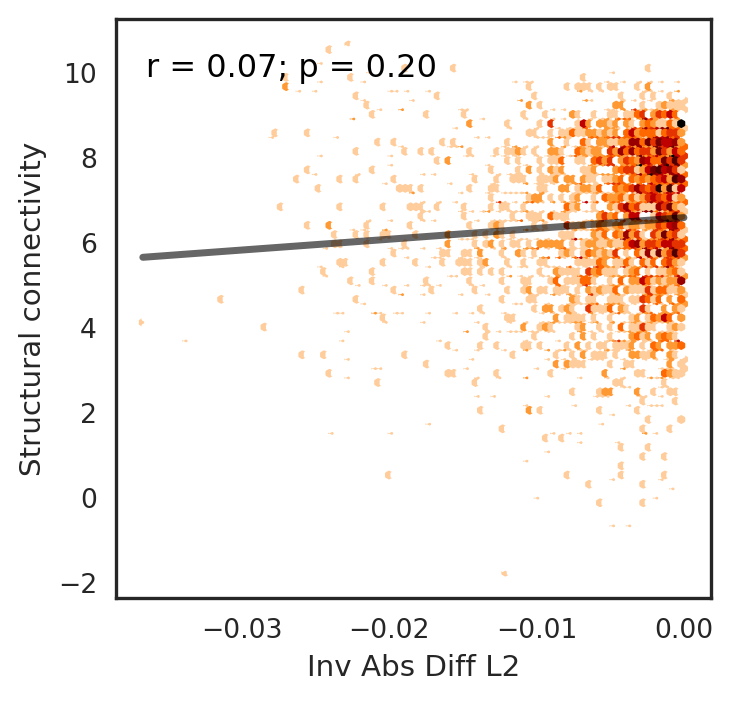

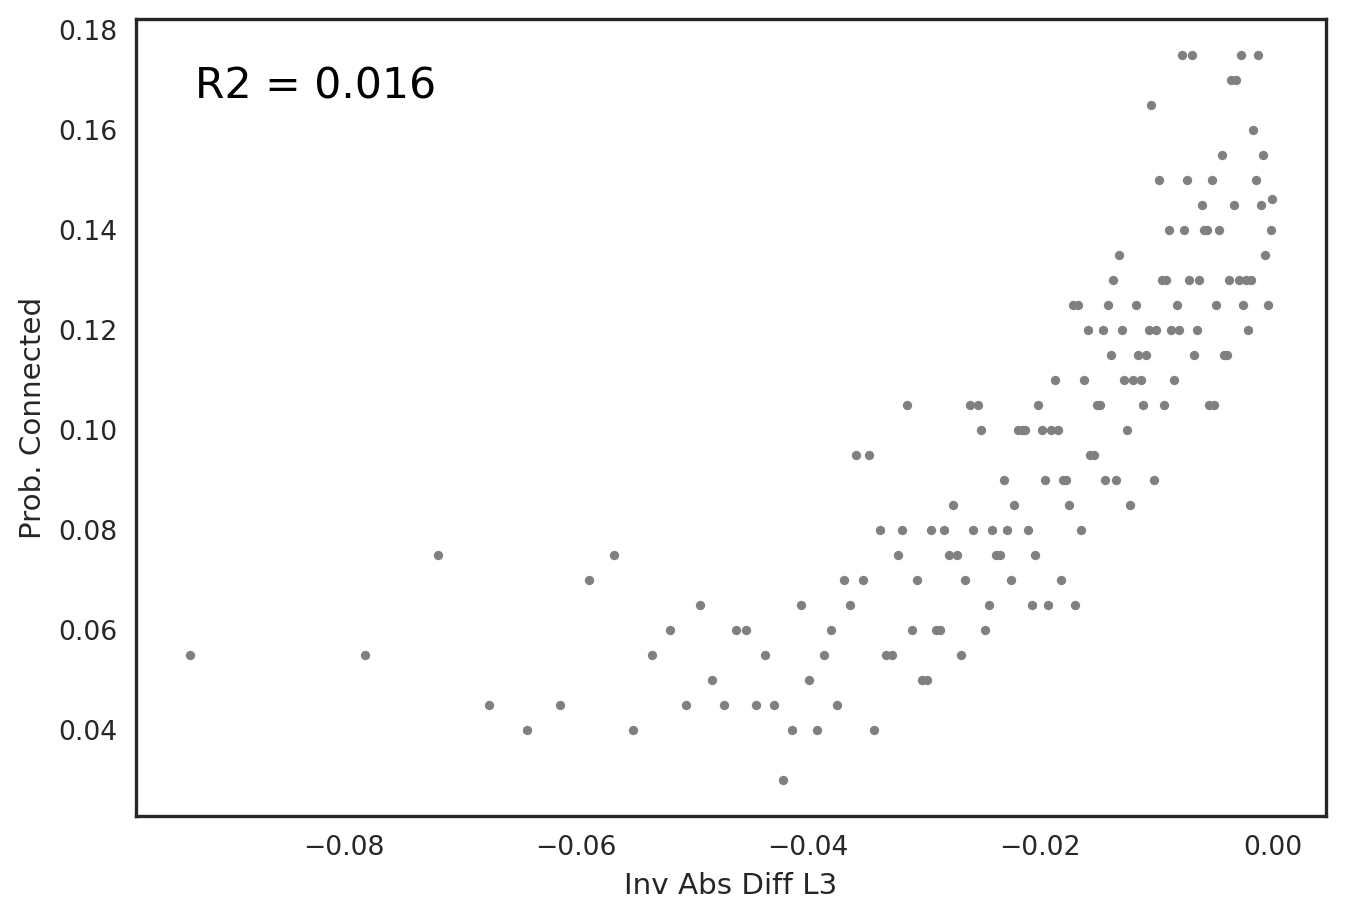

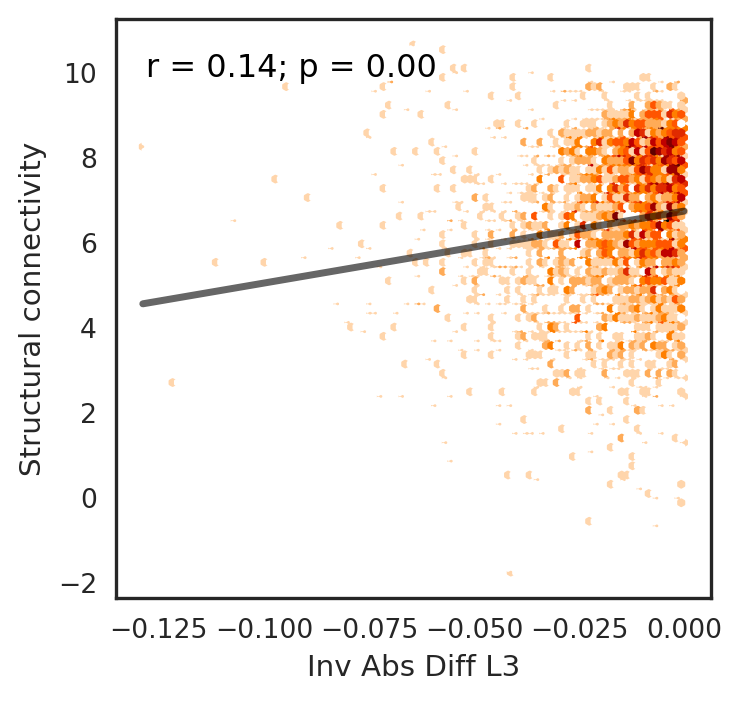

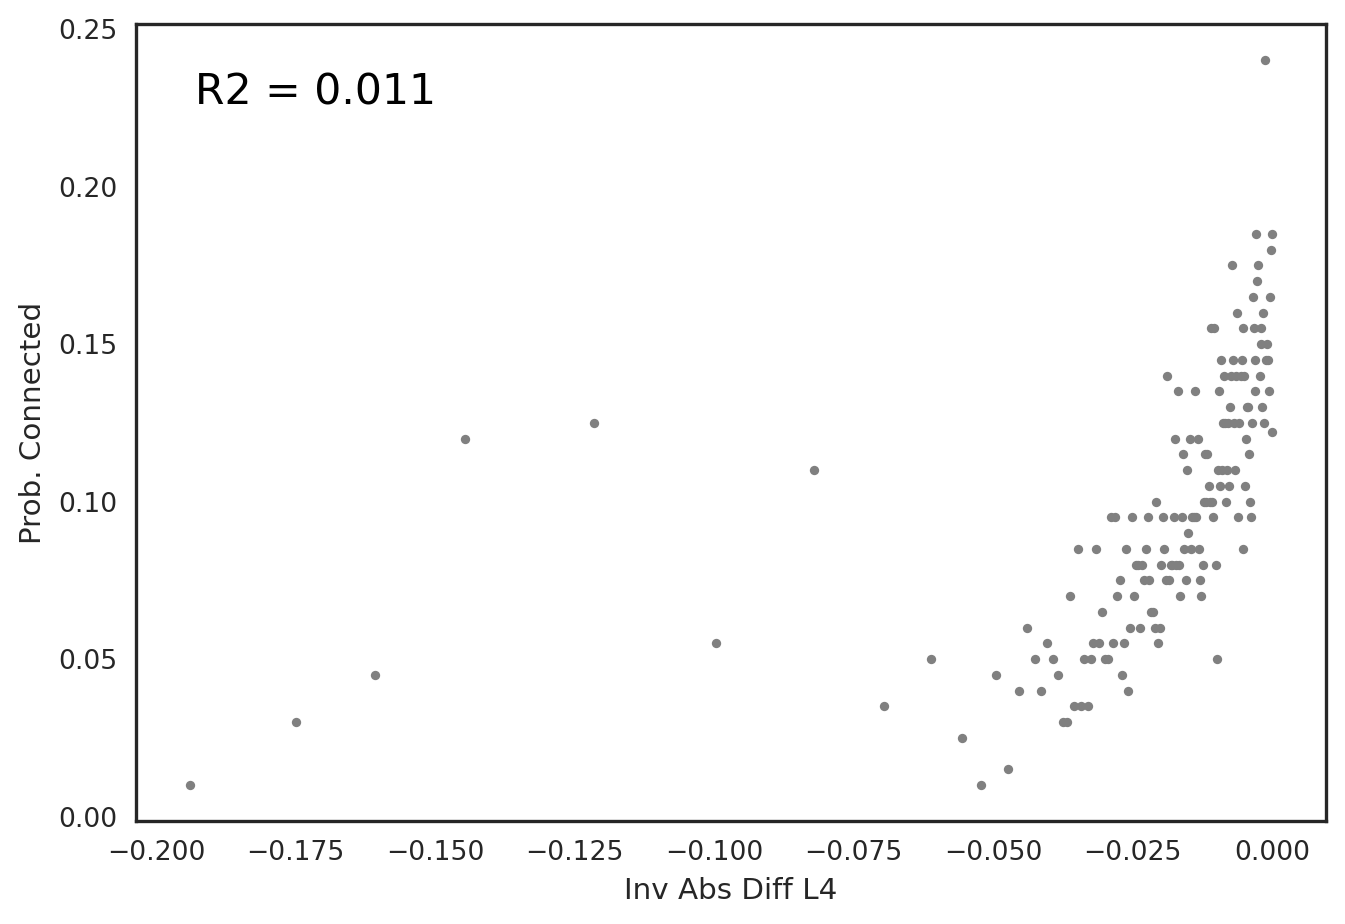

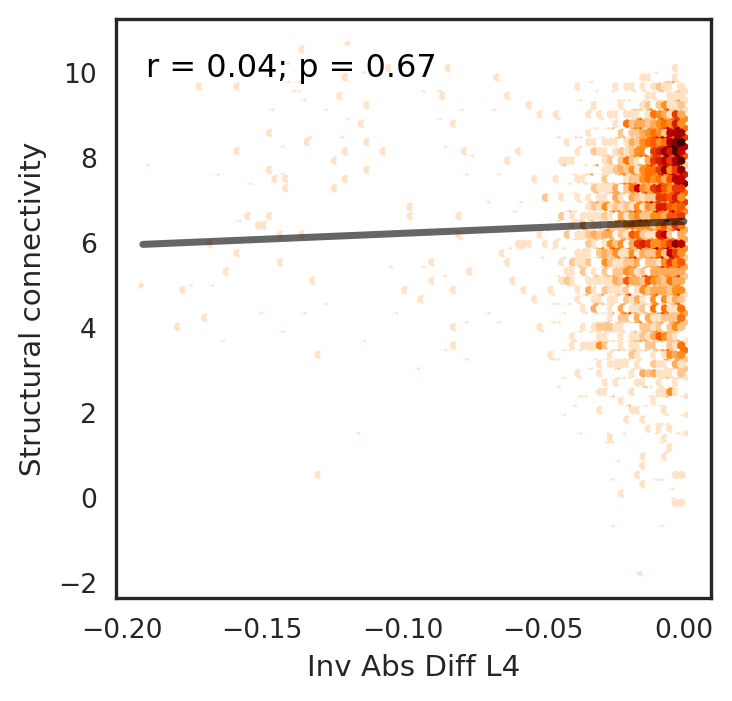

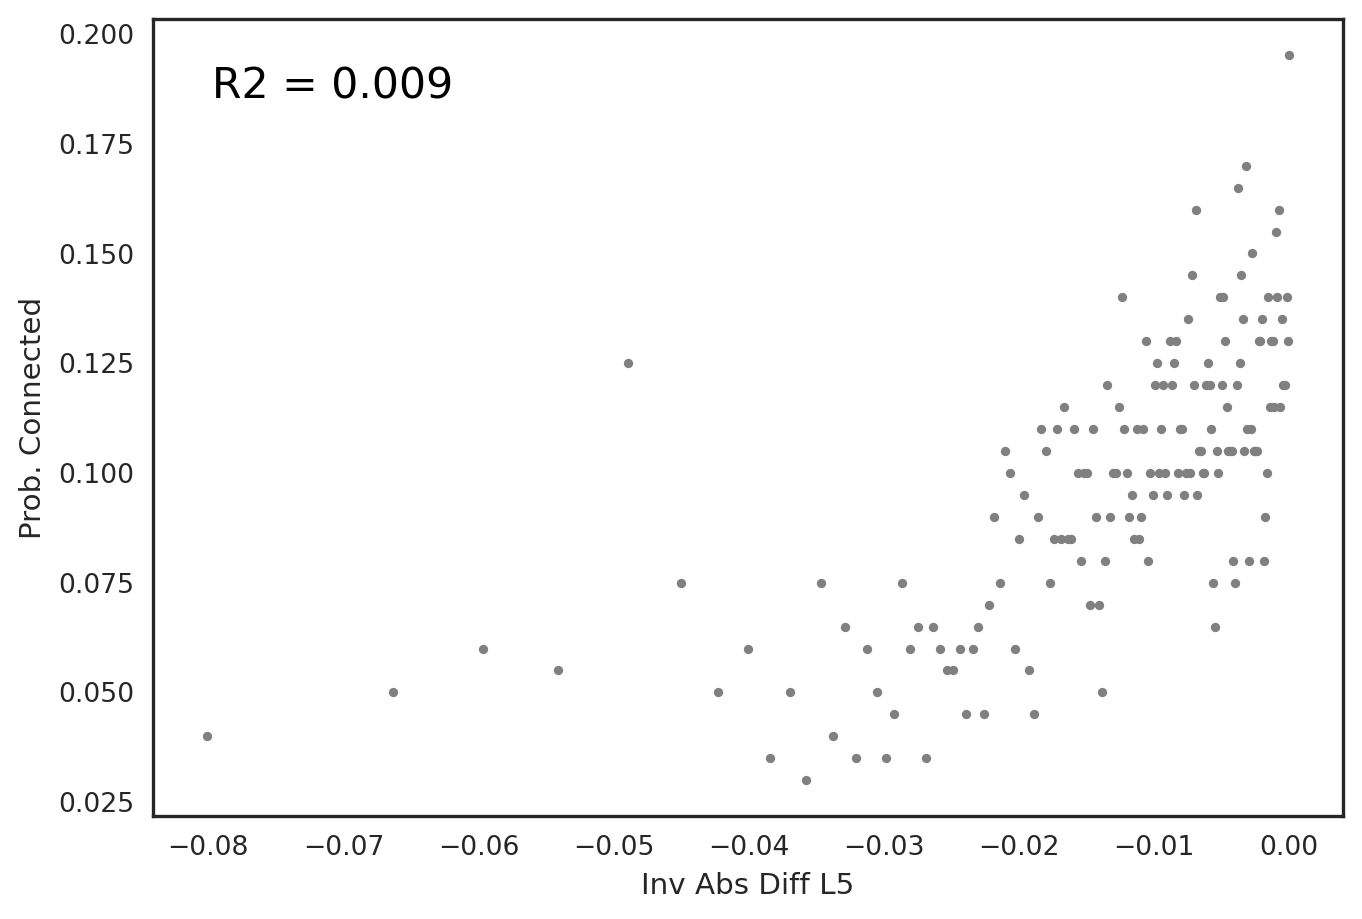

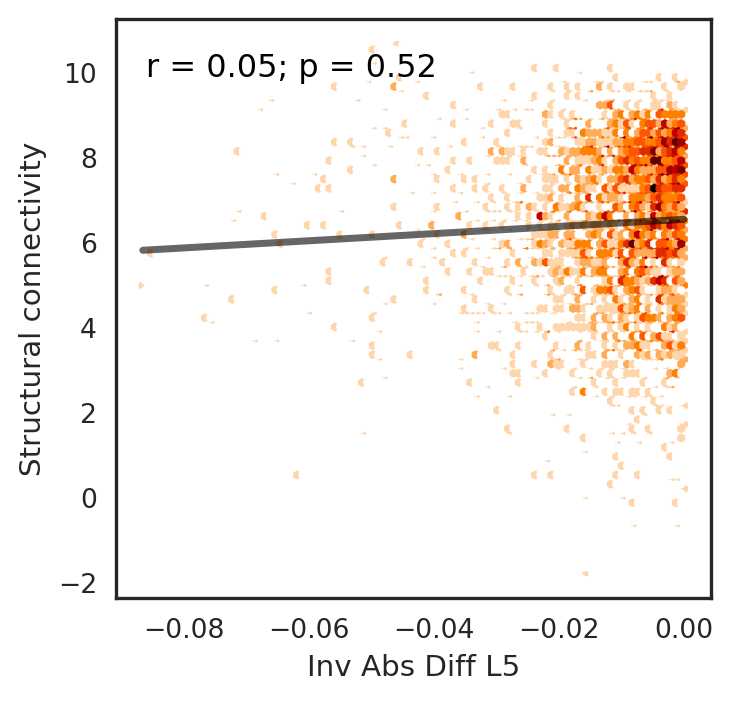

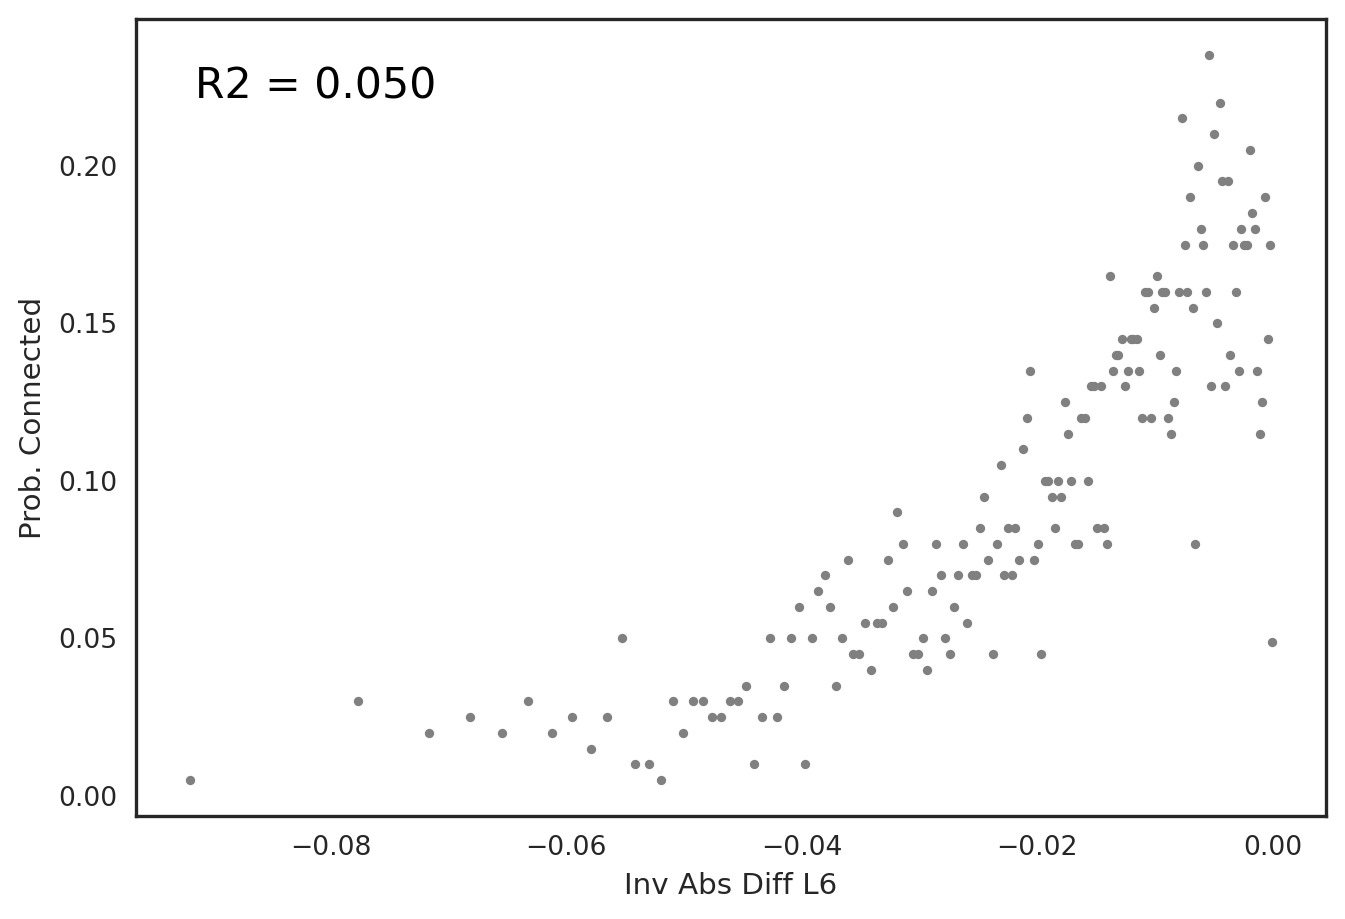

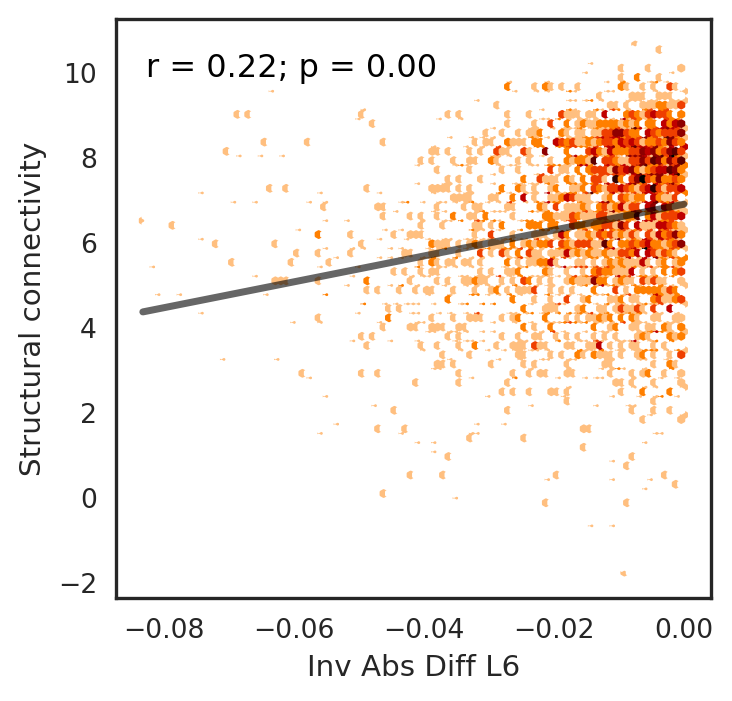

In [13]:
laminar_features = surfaces.LaminarFeatures(parcellation_name='schaefer400', exc_regions='adysgranular')
sc = matrices.ConnectivityMatrix('structural', exc_contra=True)
sc_thr = matrices.ConnectivityMatrix('structural', threshold=True, exc_contra=True)

layer_diff_matrices = []
for i in range(1, 7):
    display(Markdown(f"### Layer {i}"))
    layer_thickness = laminar_features.parcellated_data[f'Layer {i} relative thickness'].dropna().values
    parcels = laminar_features.parcellated_data.dropna().index
    abs_diff_mat = pd.DataFrame(
        - np.abs((layer_thickness[:, np.newaxis] - layer_thickness[np.newaxis, :])),
        index = parcels, columns = parcels
    )
    abs_diff_mat_obj = matrices.Matrix(abs_diff_mat, 'schaefer400', f'Inv Abs Diff L{i}', os.path.join(laminar_features.dir_path, f'L{i}diff'))
    models, pvals, null_models = sc.binarized_association(abs_diff_mat_obj, spin_test=True, n_perm=1000)
    display(f"spin pvalue for binarized association: {pvals[0]}")
    abs_diff_mat_obj.correlate_edge_wise(sc_thr, n_perm=1000, axis_off=False, figsize=(4, 4))
    layer_diff_matrices.append(abs_diff_mat_obj)

# 4. Association of difference in laminar thickness of individual layers with FC probability and strength

### Layer 1

Optimization terminated successfully.
         Current function value: 0.542000
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                0.009845
Time:                        09:24:32   Log-Likelihood:                -17366.
converged:                       True   LL-Null:                       -17539.
Covariance Type:            nonrobust   LLR p-value:                 4.411e-77
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8465      0.022    -39.261      0.000      -0.889      -0.804
inv_abs_diff_l

'spin pvalue for binarized association: 0.015'

Pearson correlation with Functional connectivity
Coef: 0.09151616127366674; p-value (spin): 0.126


### Layer 2

Optimization terminated successfully.
         Current function value: 0.545104
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                0.004174
Time:                        09:27:01   Log-Likelihood:                -17466.
converged:                       True   LL-Null:                       -17539.
Covariance Type:            nonrobust   LLR p-value:                 1.054e-33
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9925      0.020    -50.774      0.000      -1.031      -0.954
inv_abs_diff_l

'spin pvalue for binarized association: 0.066'

Pearson correlation with Functional connectivity
Coef: 0.06179311608670069; p-value (spin): 0.263


### Layer 3

Optimization terminated successfully.
         Current function value: 0.543714
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                0.006712
Time:                        09:29:31   Log-Likelihood:                -17421.
converged:                       True   LL-Null:                       -17539.
Covariance Type:            nonrobust   LLR p-value:                 3.855e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9135      0.021    -43.330      0.000      -0.955      -0.872
inv_abs_diff_l

'spin pvalue for binarized association: 0.017'

Pearson correlation with Functional connectivity
Coef: 0.042724768683066704; p-value (spin): 0.632


### Layer 4

Optimization terminated successfully.
         Current function value: 0.547376
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:               2.322e-05
Time:                        09:32:00   Log-Likelihood:                -17538.
converged:                       True   LL-Null:                       -17539.
Covariance Type:            nonrobust   LLR p-value:                    0.3668
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1610      0.017    -69.899      0.000      -1.194      -1.128
inv_abs_diff_l

'spin pvalue for binarized association: 0.9'

Pearson correlation with Functional connectivity
Coef: 0.06791664895432532; p-value (spin): 0.334


### Layer 5

Optimization terminated successfully.
         Current function value: 0.546408
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                0.001790
Time:                        09:34:30   Log-Likelihood:                -17507.
converged:                       True   LL-Null:                       -17539.
Covariance Type:            nonrobust   LLR p-value:                 2.286e-15
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0585      0.019    -55.108      0.000      -1.096      -1.021
inv_abs_diff_l

'spin pvalue for binarized association: 0.366'

Pearson correlation with Functional connectivity
Coef: 0.038733340345311604; p-value (spin): 0.548


### Layer 6

Optimization terminated successfully.
         Current function value: 0.542609
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                0.008731
Time:                        09:36:59   Log-Likelihood:                -17386.
converged:                       True   LL-Null:                       -17539.
Covariance Type:            nonrobust   LLR p-value:                 1.433e-68
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8700      0.021    -40.759      0.000      -0.912      -0.828
inv_abs_diff_l

'spin pvalue for binarized association: 0.138'

Pearson correlation with Functional connectivity
Coef: 0.1902616522940871; p-value (spin): 0.006


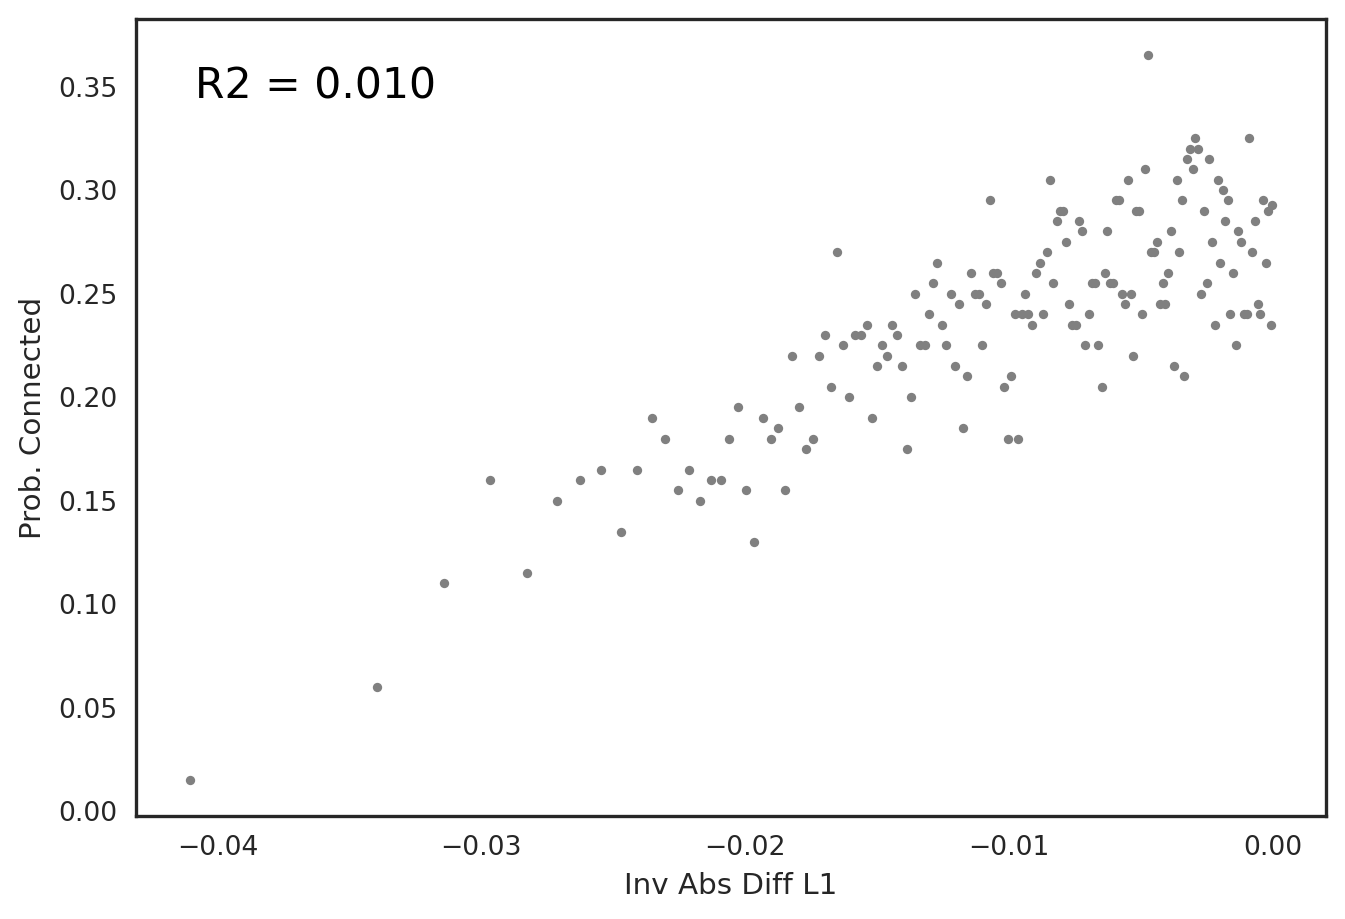

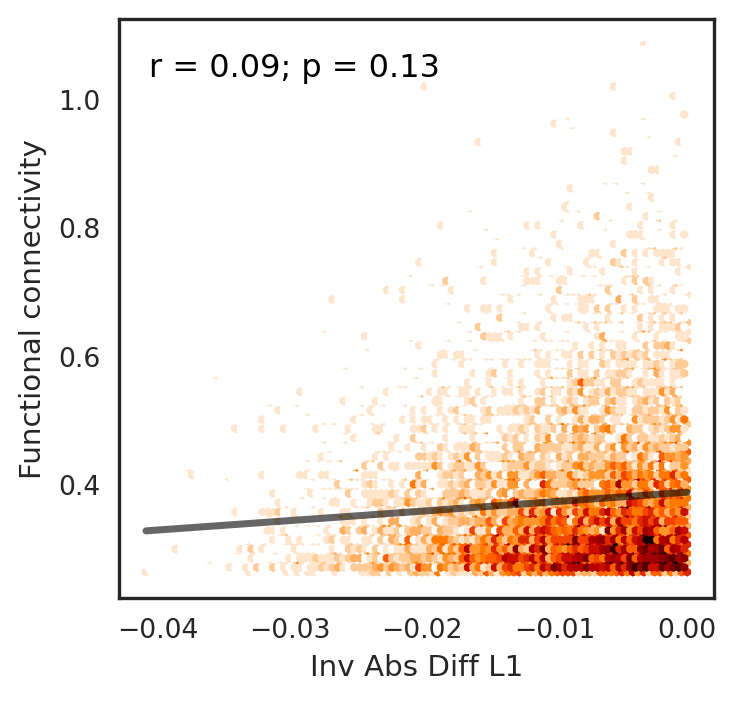

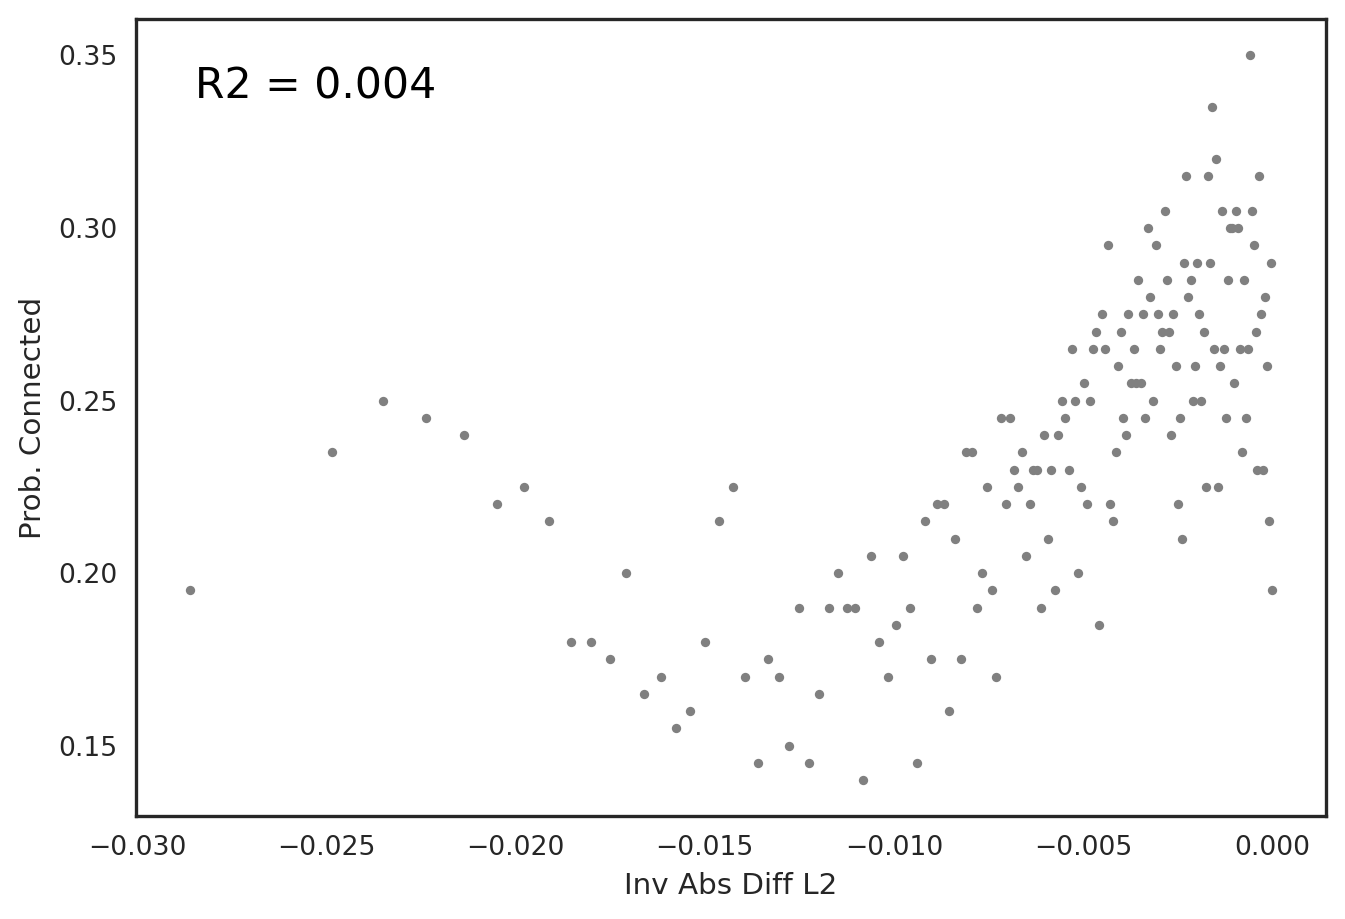

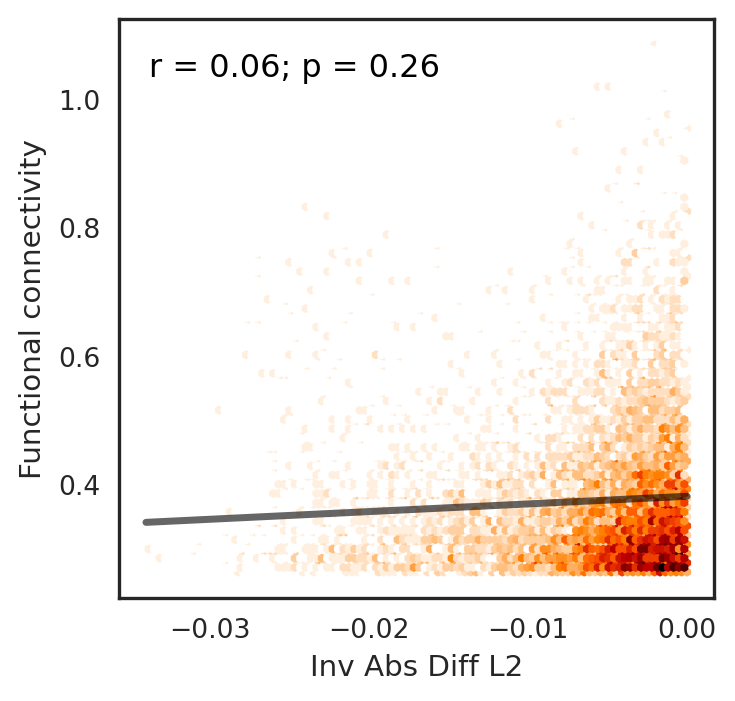

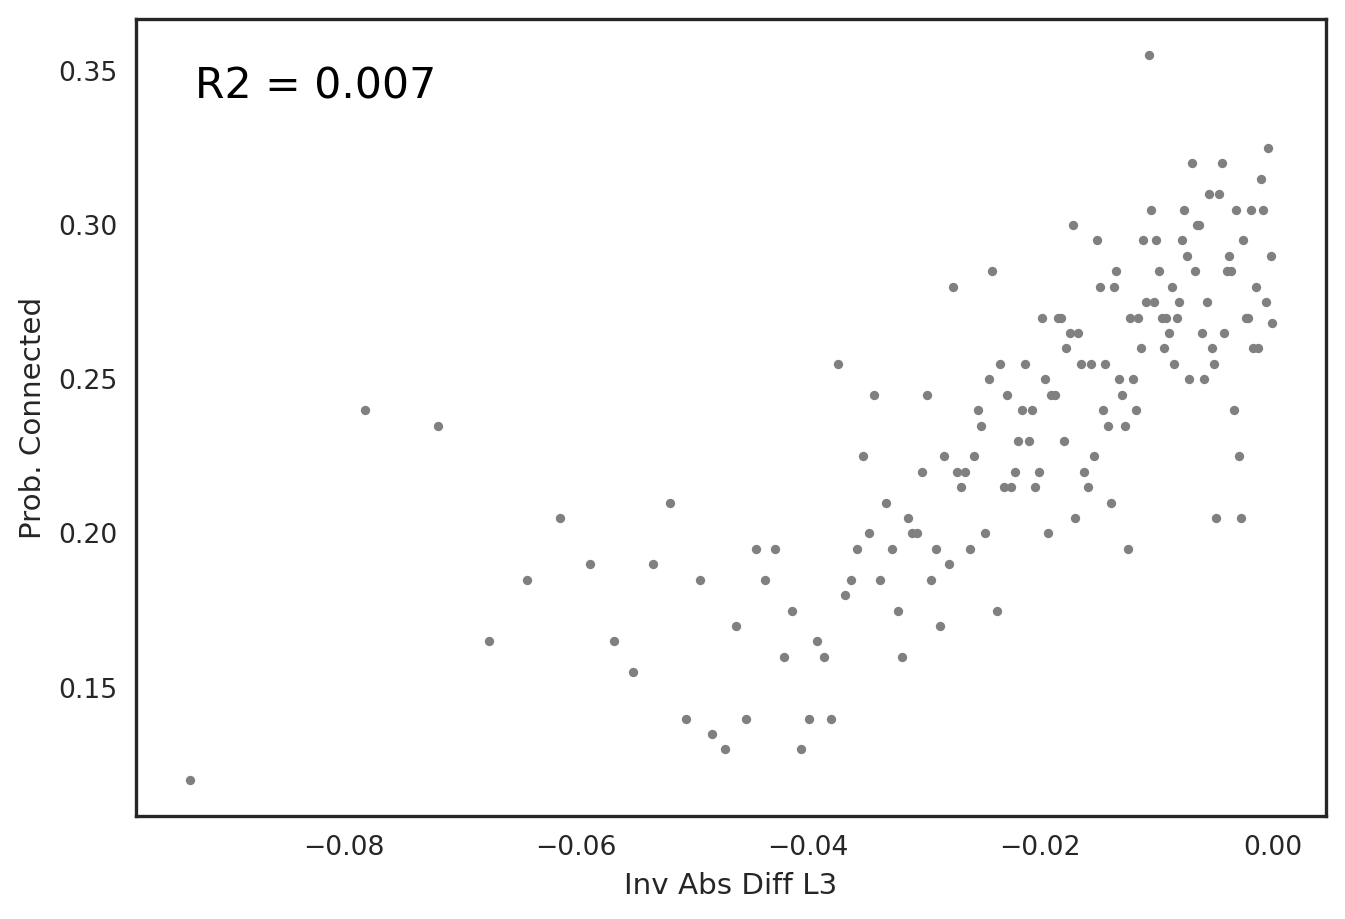

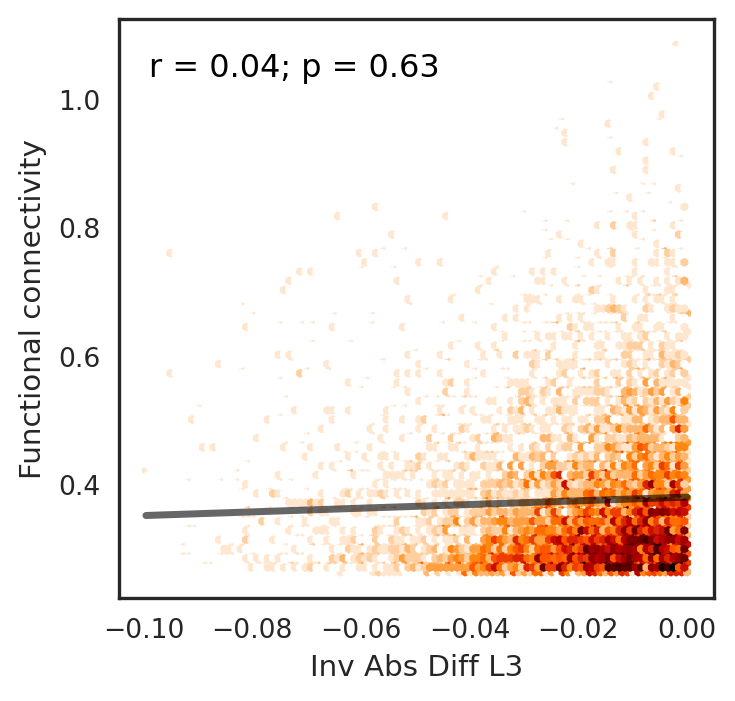

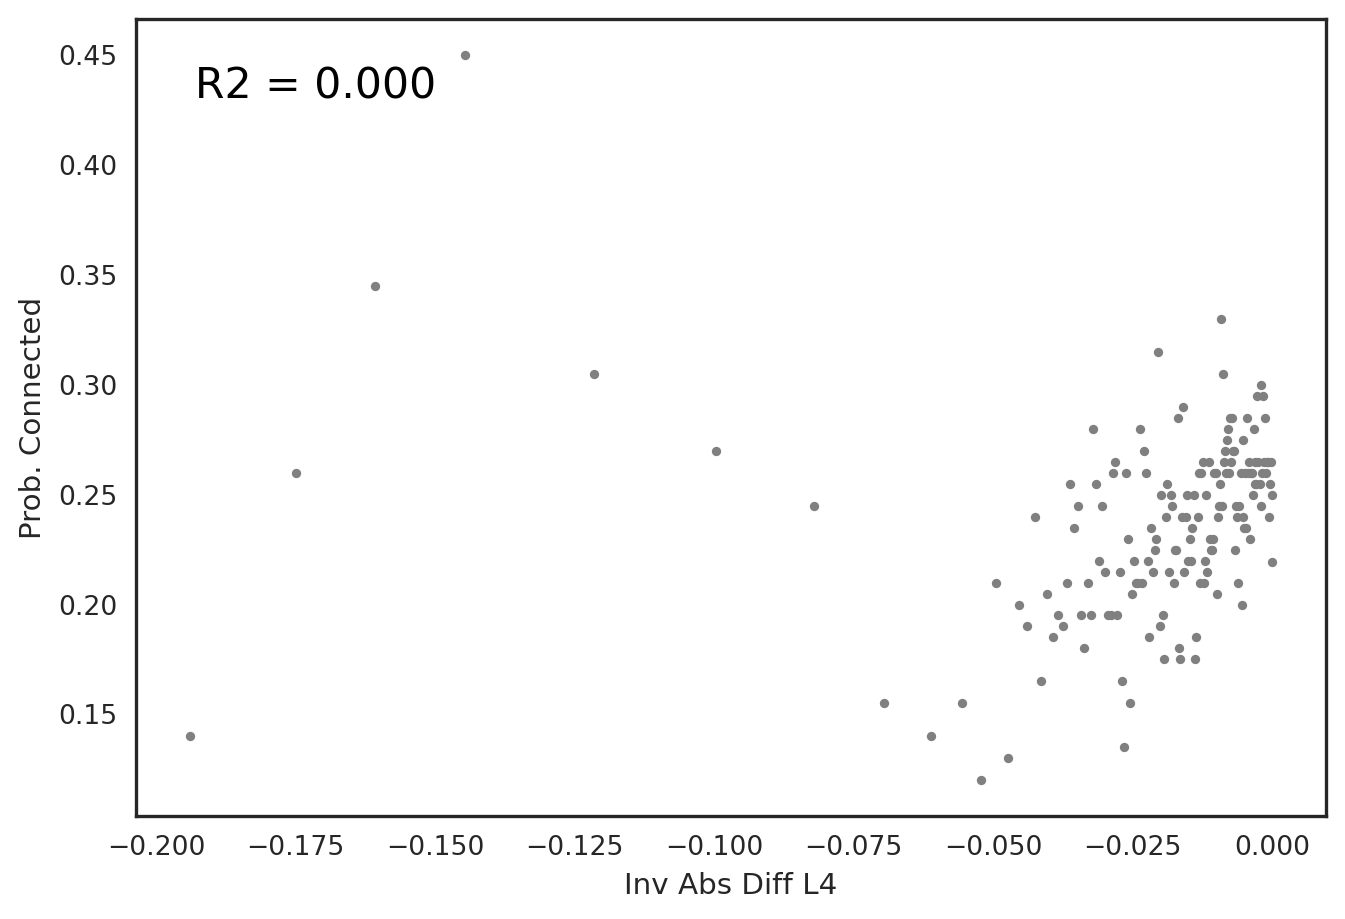

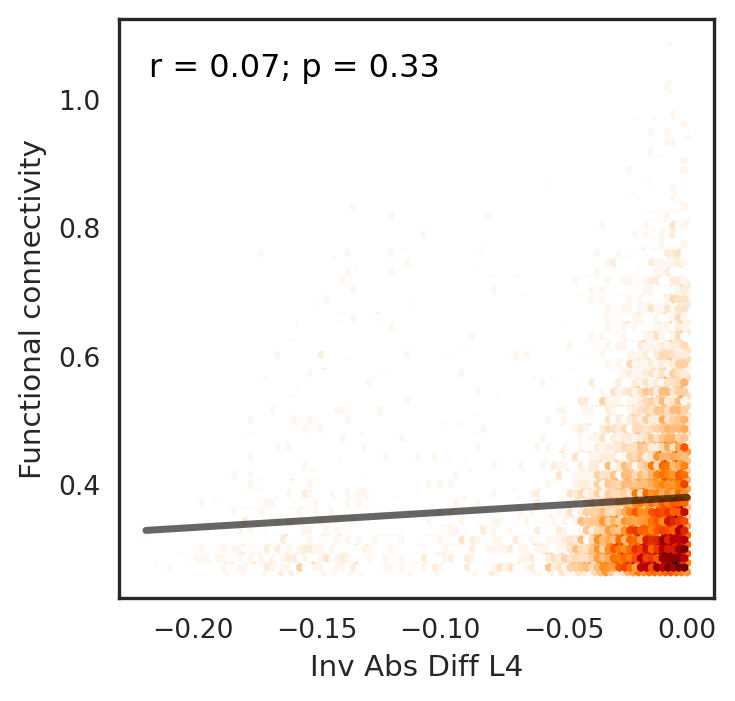

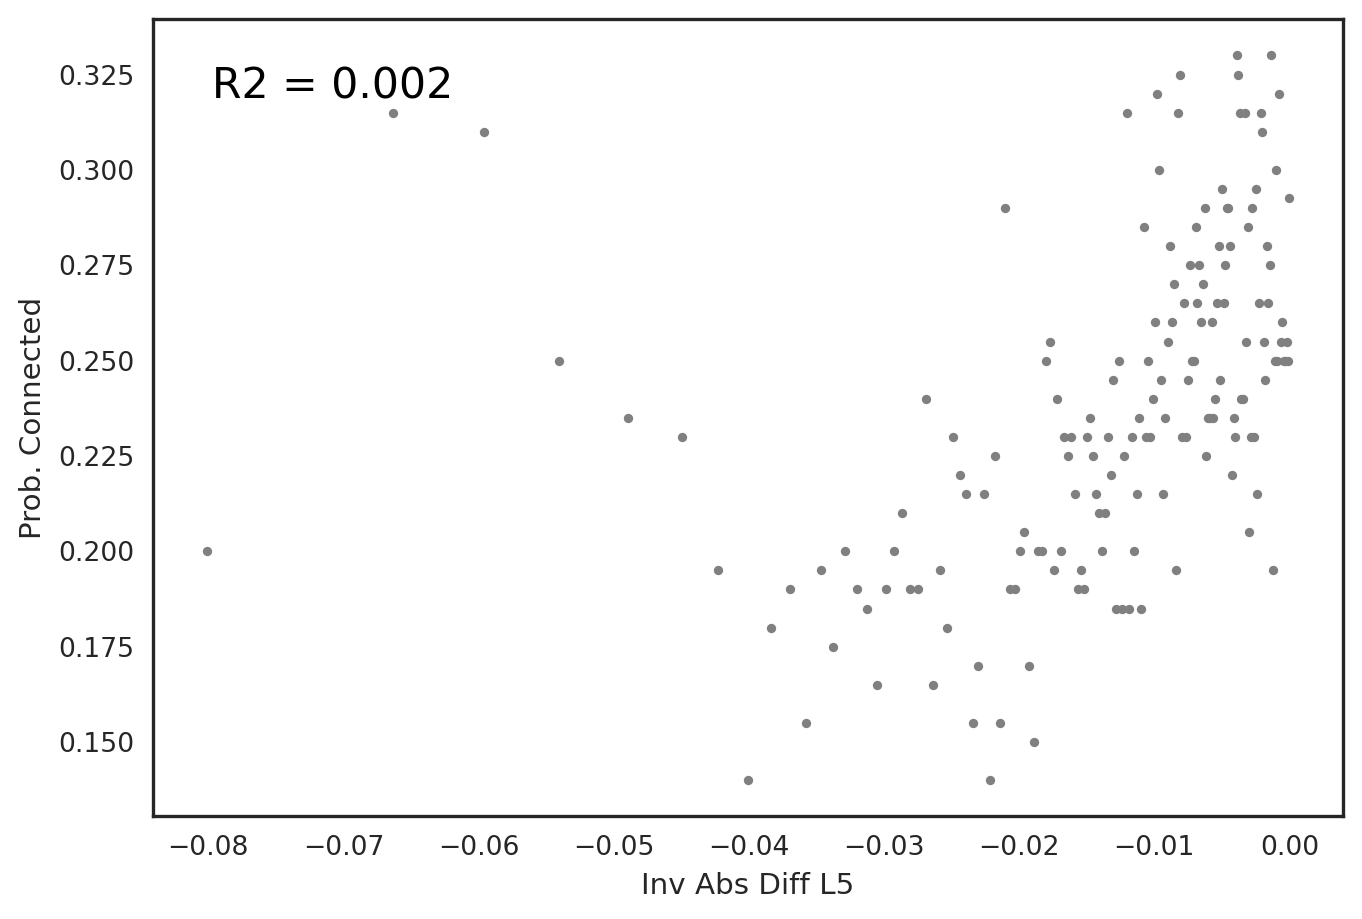

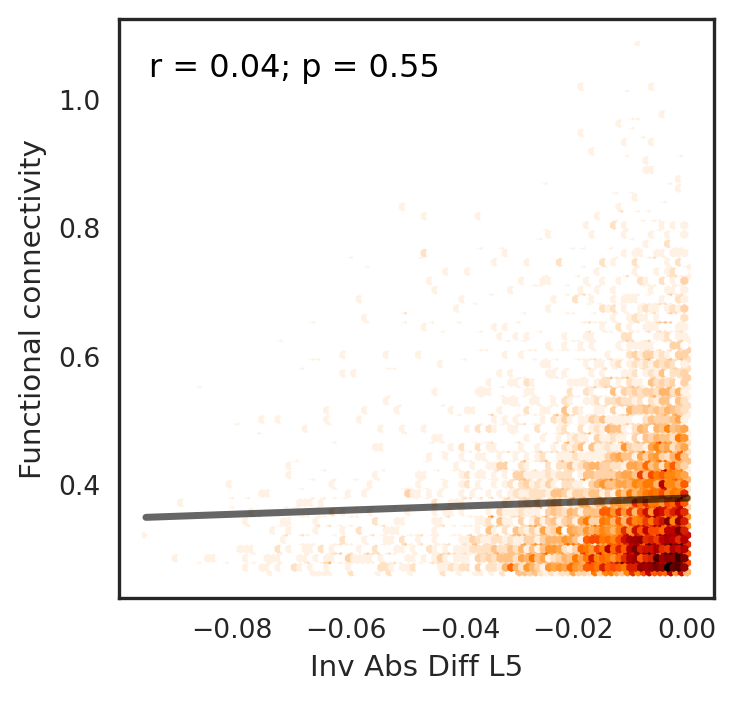

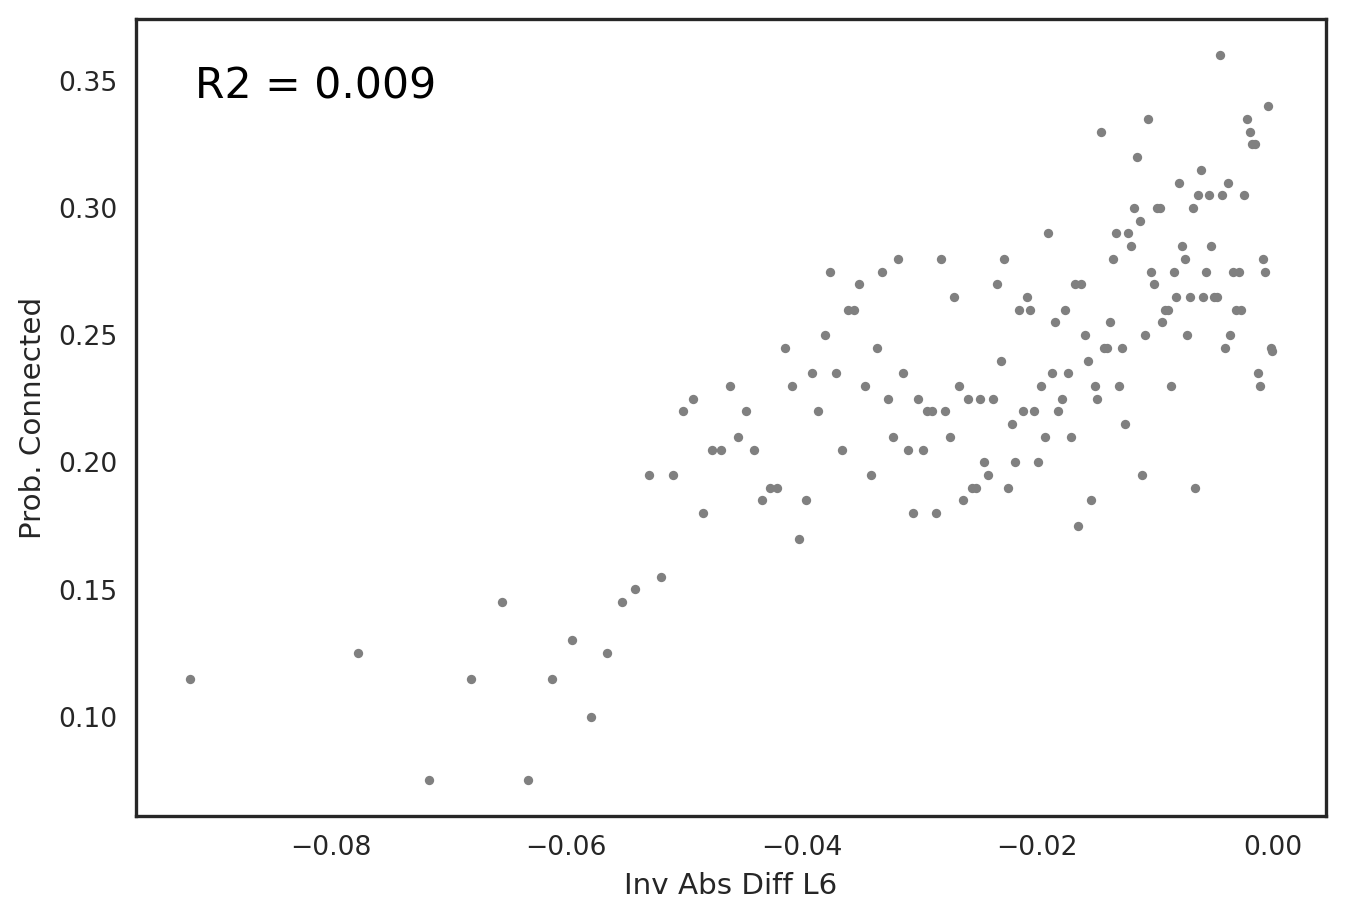

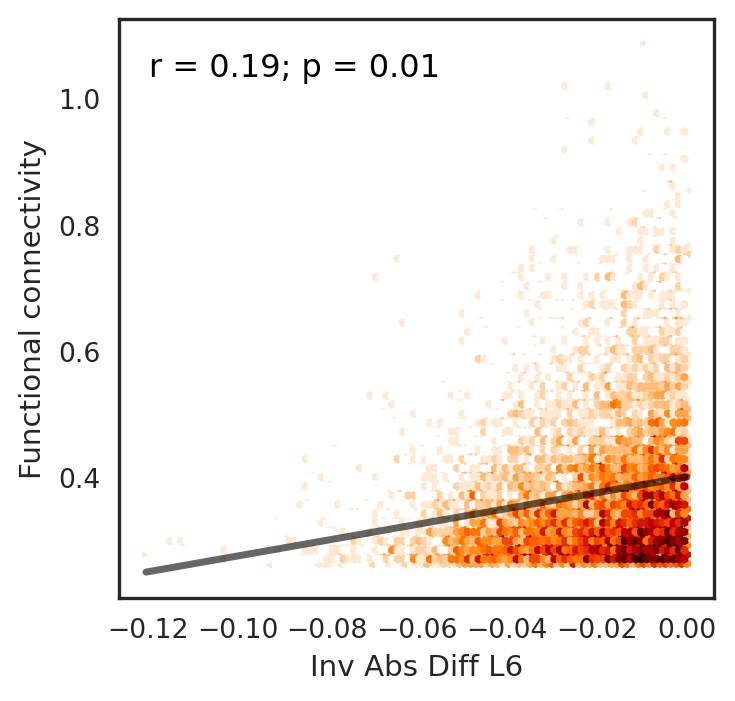

In [14]:
laminar_features = surfaces.LaminarFeatures(parcellation_name='schaefer400', exc_regions='adysgranular')
fc = matrices.ConnectivityMatrix('functional', exc_contra=True)
fc_thr = matrices.ConnectivityMatrix('functional', threshold=True, exc_contra=True)

layer_diff_matrices = []
for i in range(1, 7):
    display(Markdown(f"### Layer {i}"))
    layer_thickness = laminar_features.parcellated_data[f'Layer {i} relative thickness'].dropna().values
    parcels = laminar_features.parcellated_data.dropna().index
    abs_diff_mat = pd.DataFrame(
        - np.abs((layer_thickness[:, np.newaxis] - layer_thickness[np.newaxis, :])),
        index = parcels, columns = parcels
    )
    abs_diff_mat_obj = matrices.Matrix(abs_diff_mat, 'schaefer400', f'Inv Abs Diff L{i}', os.path.join(laminar_features.dir_path, f'L{i}diff'))
    models, pvals, null_models = fc.binarized_association(abs_diff_mat_obj, spin_test=True, n_perm=1000)
    display(f"spin pvalue for binarized association: {pvals[0]}")
    abs_diff_mat_obj.correlate_edge_wise(fc_thr, n_perm=1000, axis_off=False, figsize=(4, 4))
    layer_diff_matrices.append(abs_diff_mat_obj)